# 如何使用Python擬合資料?

## 參考資料

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">numpy.polyfit</a>
* <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html" target="_blank">scipy.optimize.curve_fit</a>, <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html" target="_blank">scipy.optimize.least_squares</a>
* <a href="http://docs.astropy.org/en/stable/modeling/index.html" target="_blank">astropy.modeling</a> 
* <a href="http://www.astroml.org/" target="_blank">AstroML</a>

## 準備工作：範例所需檔案下載及說明

* O-C_ephemeris.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* pulse-profile.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)


* QSOnumber.txt (已在files4examples資料夾中無須下載)：

  檔案說明(待補)
  

* 其他範例檔案(待補)


## 範例1：以NumPy的polyfit多項式曲線擬合O-C ephemeris

In [1]:
from astropy.io import ascii
oc_ephemeris = ascii.read('../files4examples/O-C_ephemeris.txt', names=['cycles', 'delay', 'error'])
cycles = oc_ephemeris['cycles']
delay = oc_ephemeris['delay']
error = oc_ephemeris['error']

* <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html" target="_blank">polyfit</a>為NumPy中以多項式曲線來擬合資料的函式，回傳值為多項式的係數。 <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html" target="_blank">poly1d</a>為NumPy中用來產生多項式物件的類別。

In [2]:
import numpy as np
p2 = np.poly1d(np.polyfit(cycles, delay, 2))
p3 = np.poly1d(np.polyfit(cycles, delay, 3))
x = np.linspace(-10000, 50000, 100)

<IPython.core.display.Javascript object>


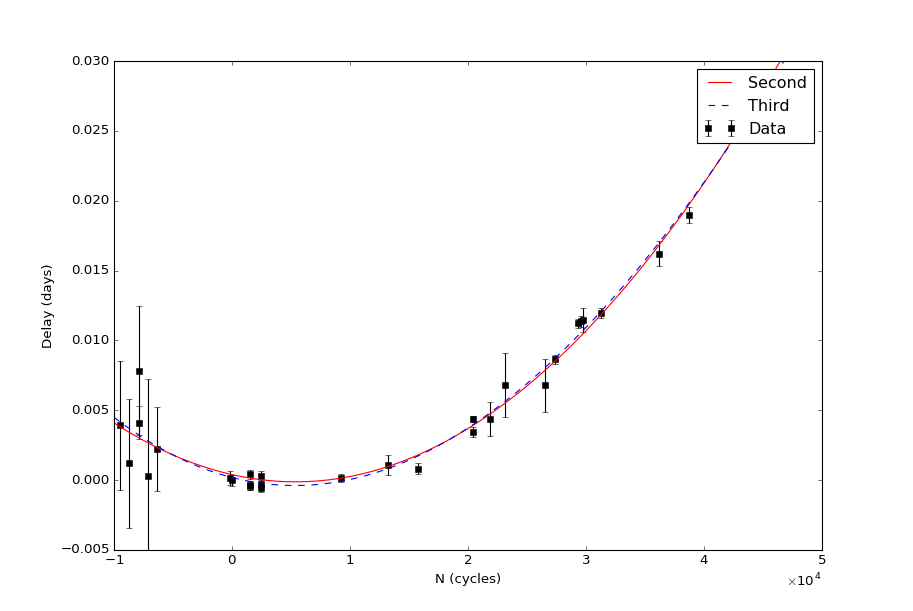

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
fig = plt.figure()
ax = fig.add_subplot(111)
plt.errorbar(cycles, delay, yerr=error, fmt='sk')
plt.hold(True)
plt.plot(x, p2(x), 'r-')
plt.plot(x, p3(x), '--')
plt.hold(False)
plt.ylim(-0.005, 0.03)
plt.legend(('Second', 'Third', 'Data'))
plt.xlabel('N (cycles)')
plt.ylabel('Delay (days)')
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.show()

## 範例2：以AstroML的LinearRegression來擬合pulse-profile

* <a href="https://github.com/astroML/astroML" target="_blank">AstroML</a> 是一個專門用於天文資料的統計、探勘與機器學習的Python套件，雖然Anaconda沒有預先安裝此套件，不過可透過pip指令安裝:
```bash
pip install astroML
pip install astroML_addons
```

In [4]:
from astropy.io import ascii
pulse_profile = ascii.read('../files4examples/pulse-profile.txt', names=['phase', 'rate', 'error'])
phase = pulse_profile['phase']
rate =pulse_profile['rate']
error = pulse_profile['error']

In [5]:
import numpy as np
from astroML.linear_model import LinearRegression

x = np.array([np.sin(2 * np.pi * phase), np.cos(2 * np.pi * phase), 
              np.sin(4 * np.pi * phase), np.cos(4 * np.pi * phase)]).T

model = LinearRegression()
model.fit(x, rate, error)
coef = model.coef_
y_pred = model.predict(x)
print(coef)

[ 88.89855452  -0.76346906   2.11349999   0.70749647   0.63919169]


<IPython.core.display.Javascript object>


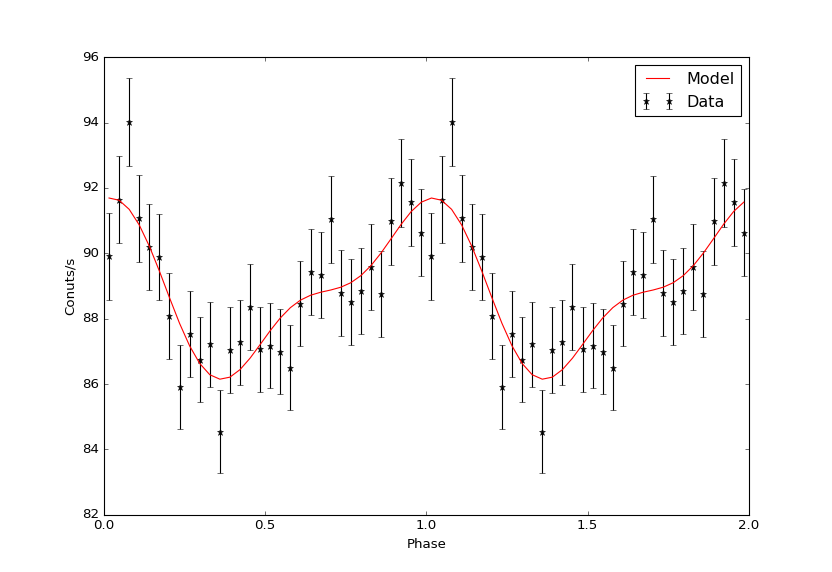

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
phase2 =  np.append(phase, phase + 1)
rate2 = np.append(rate, rate)
error2 = np.append(error, error)
y_pred2 = np.append(y_pred, y_pred)

plt.figure()
plt.errorbar(phase2, rate2, yerr=error2,  fmt="*k", label='Data')
plt.hold(True)
plt.plot(phase2, y_pred2, 'r-', label='Model')
plt.hold(False)
plt.xlabel('Phase')
plt.ylabel('Conuts/s')
plt.legend()
plt.show()

## 範例3：以SciPy的curve_fit來擬合pulse-profile

In [7]:
from astropy.io import ascii
pulse_profile = ascii.read('../files4examples/pulse-profile.txt', names=['phase', 'rate', 'error'])
phase = pulse_profile['phase']
rate =pulse_profile['rate']
error = pulse_profile['error']

In [8]:
from scipy.optimize import curve_fit
import numpy as np

# 定義模型
def model(x, a0, a1, a2, a3, a4):
    return ( a0 + a1 * np.sin(2 * np.pi * x) +  a2 * np.cos(2 * np.pi * x) +
            a3 * np.sin(4 * np.pi * x) + a4 * np.cos(4 * np.pi * x) )

# 曲線擬合
popt, pcov = curve_fit(model, phase, rate, sigma=error)
perr = np.sqrt(np.diag(pcov))
print(popt)
print(pcov)
print("a0 =", popt[0], "+/-", perr[0])
print("a1 =", popt[1], "+/-", perr[1])
print("a2 =", popt[2], "+/-", perr[2])
print("a3 =", popt[3], "+/-", perr[3])
print("a4 =", popt[4], "+/-", perr[4])

[ 88.89855452  -0.76346896   2.11350003   0.70749648   0.63919159]
[[ 0.04283942 -0.00036791  0.00101848  0.00034094  0.00030802]
 [-0.00036791  0.08536753  0.00034424  0.00092261  0.00060634]
 [ 0.00101848  0.00034424  0.08598668 -0.00013985  0.00110847]
 [ 0.00034094  0.00092261 -0.00013985  0.0858235  -0.00021854]
 [ 0.00030802  0.00060634  0.00110847 -0.00021854  0.08550514]]
a0 = 88.898554518 +/- 0.206976851533
a1 = -0.763468957894 +/- 0.29217722702
a2 = 2.11350003162 +/- 0.293234852263
a3 = 0.70749647856 +/- 0.292956478951
a4 = 0.639191588876 +/- 0.292412616893


<IPython.core.display.Javascript object>


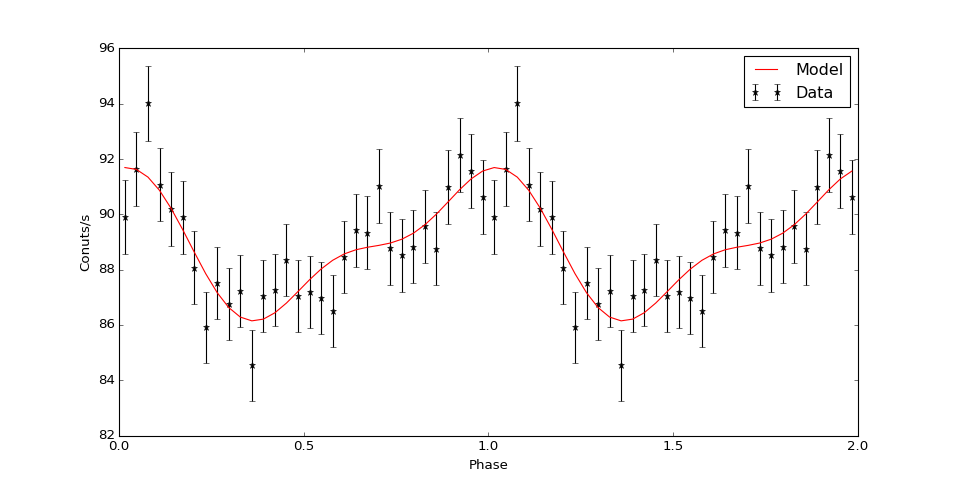

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
phase2 =  np.append(phase, phase + 1)
rate2 = np.append(rate, rate)
error2 = np.append(error, error)
plt.figure()
plt.errorbar(phase2, rate2, yerr=error2, fmt="*k", label='Data')
plt.hold(True)
plt.plot(phase2, model(phase2, popt[0], popt[1], popt[2], popt[3], popt[4]), 'r-', label='Model')
plt.hold(False)
plt.xlabel('Phase')
plt.ylabel('Conuts/s')
plt.legend()
plt.show()

## 範例4：以astropy.modeling中的一維高斯曲線擬合QSO數量分佈

In [10]:
from astropy.io import ascii
data = ascii.read('../files4examples/QSOnumber.txt')
x = data['x']
y = data['y']

In [11]:
from astropy.modeling import models as mo, fitting as fit
import numpy as np
model_init = mo.Gaussian1D(amplitude=4220, mean=-0.25, stddev=0.1)
fitter = fit.LevMarLSQFitter()
fit_res = fitter(model_init, x, y)
print(fit_res.amplitude)
print(fit_res.mean)
print(fit_res.stddev)

Parameter('amplitude', value=4078.8970040617974)
Parameter('mean', value=-0.17176406050119747)
Parameter('stddev', value=0.045674628679433164)


<IPython.core.display.Javascript object>


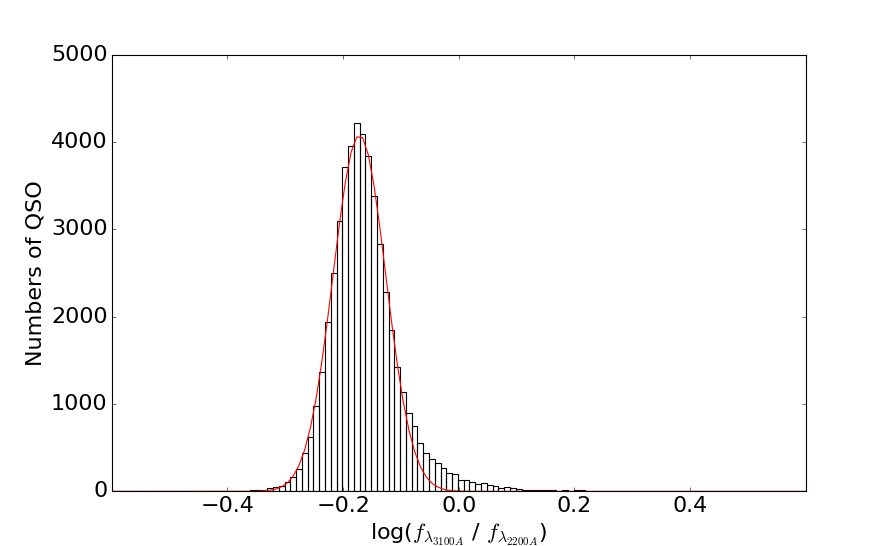

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.bar(x, y, width=x[1]-x[0], align='center', edgecolor='black', fill=False)
plt.hold(True)
plt.plot(x, fit_res(x), 'r')
plt.hold(False)
plt.xlim(-0.6, 0.6)
plt.ylim(0, 5000)
plt.xlabel('log($f_{\lambda_{3100A}}$ / $f_{\lambda_{2200A}}$)', fontsize=20)
plt.ylabel('Numbers of QSO', fontsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xticks(np.arange(-0.4,0.5,0.2), fontsize=20)
plt.show()

## 範例5：以astropy.modeling中多個sin的疊加來擬合pulse-profile

In [13]:
from astropy.io import ascii
pulse_profile = ascii.read('../files4examples/pulse-profile.txt', names=['phase', 'rate', 'error'])
phase = pulse_profile['phase']
rate =pulse_profile['rate']
error = pulse_profile['error']

In [14]:
from astropy.modeling import models as mo, fitting as fit
import numpy as np

mo1_init = mo.Const1D(amplitude=np.mean(rate)) + mo.Sine1D(amplitude=2, frequency=1, phase=np.pi/2)
mo2_init = mo.Const1D(amplitude=np.mean(rate)) + mo.Sine1D(amplitude=-0.7, frequency=1) + \
           mo.Sine1D(amplitude=2, frequency=1, phase=np.pi/2)
# mo2_init = mo.Const1D(amplitude=np.mean(rate)) + mo.Sine1D(amplitude=-0.7, frequency=1) + \
#            mo.Sine1D(amplitude=2, frequency=1, phase=np.pi/2) + mo.Sine1D(amplitude=0.7, frequency=2) + \
#            mo.Sine1D(amplitude=0.6, frequency=2, phase=np.pi/2)

fitter = fit.SLSQPLSQFitter()
fit_res1 = fitter(mo1_init, phase, rate)
fit_res2 = fitter(mo2_init, phase, rate)
print(fit_res1)
print(fit_res2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 51.9295110449
            Iterations: 16
            Function evaluations: 117
            Gradient evaluations: 16
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 36.6142766719
            Iterations: 86
            Function evaluations: 823
            Gradient evaluations: 86
Model: CompoundModel0
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Const1D(amplitude=88.9115655625)>

    [1]: <Sine1D(amplitude=2.0, frequency=1.0, phase=1.5707963267948966)>
Parameters:
    amplitude_0   amplitude_1   frequency_1      phase_1   
    ------------ ------------- -------------- -------------
    88.888848704 2.24075880697 -1.01090703408 1.19919983318
Model: CompoundModel2
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Const1D(amplitude=88.9115655625)>

    [1]: <Si

<IPython.core.display.Javascript object>


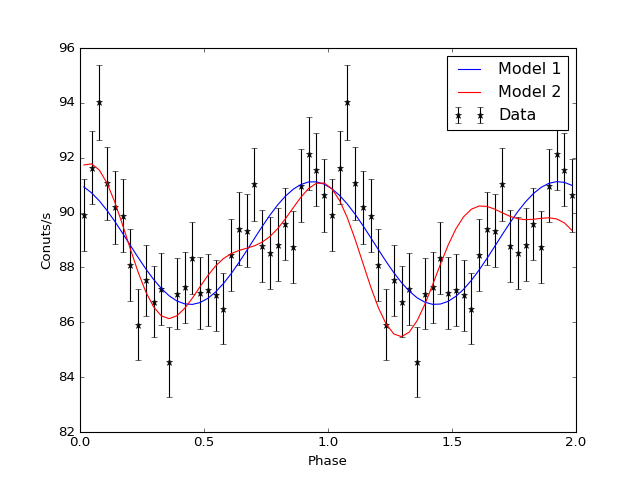

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
phase2 =  np.append(phase, phase + 1)
rate2 = np.append(rate, rate)
error2 = np.append(error, error)
plt.figure()
plt.errorbar(phase2, rate2, yerr=error2, fmt='*k')
plt.hold(True)
plt.plot(phase2, fit_res1(phase2))
plt.plot(phase2, fit_res2(phase2), 'r')
plt.hold(False)
plt.legend(('Model 1', 'Model 2', 'Data'))
plt.xlabel('Phase')
plt.ylabel('Conuts/s')
plt.show()

## 範例6：以astropy.modeling中的二維高斯曲線擬合 (待博識補充)

In [16]:
# Gaussian fit 的 function
def get_gaussfit(bin_img):
    '''
    Propose: to fit an 2D image with an 2D gaussian function
             initial guess of parameters: 
                  x_mean & y_mean at the center of the image
                  x_width & y_width = 2 pixels
                  amplitude = max(image)
             best parameters were optimized by least-square method
    Parameter
    ----------------------
    bin_img: an 2D image
    
    ======================
    Output
    ----------------------
    object of fitting.LevMarLSQFitter()
    
    '''
    x_size=bin_img.shape[0]
    y_size=bin_img.shape[1]
    p_init = models.Gaussian2D(amplitude=np.max(bin_img),x_mean=0.5*x_size,y_mean=0.5*y_size,x_stddev=2,y_stddev=2)
    y, x = np.mgrid[:bin_img.shape[1], :bin_img.shape[0]]
    fit_p = fitting.LevMarLSQFitter()
    p = fit_p(p_init, x,y,bin_img)
    return p;

import numpy as np
import astropy.units as units
import matplotlib.pyplot as plt
from astropy.table import Table
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.modeling import models, fitting

#catalog_list = Vizier.find_catalogs('PPMXL')

#取消回傳的 row <= 50的限制
Vizier.ROW_LIMIT = -1

#建立格點
x=36 #全天
y=17 #全天
grid_x=np.arange(x)*10
grid_y=np.arange(y)*10-80

# 定義輸出的表格
result_table = Table(names=('RA', 'DE', 'mRA_offset','mDE_offset'), dtype=('f4', 'f4', 'f4', 'f4'))
result_table['RA'].unit=units.deg
result_table['DE'].unit=units.deg
result_table['mRA_offset'].unit=units.mas/units.year
result_table['mDE_offset'].unit=units.mas/units.year

#對每個格點在 Vizier上 query PPMXL, 搜尋半徑 10 arcminutes 
for x in grid_x:
    for y in grid_y:
        result = Vizier.query_region(SkyCoord(ra=x*units.deg, dec=y*units.deg,frame="icrs"), radius=10.0*units.arcmin, catalog=('I/317'))
        #name=str(x)+'_'+str(y)+'.csv'
        #ascii.write(result[0], name, format='csv')
        #plt.plot(result[0]['pmRA'],result[0]['pmDE'],'r.')
        bin_img, yedges, xedges = np.histogram2d(result[0]['pmRA'], result[0]['pmDE'], (20,20),range=[[-100,100],[-100,100]])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        #plt.imshow(bin_img, extent=extent, interpolation='nearest', cmap='gist_yarg', origin='lower')
        fit_results=get_gaussfit(bin_img)
        ra_off=(fit_results.x_mean-(bin_img.shape[0]*0.5))*10
        de_off=(fit_results.y_mean-(bin_img.shape[1]*0.5))*10
        #theta=1./np.cos(y)*
        result_table.add_row([x,y,ra_off,de_off])

ImportError: No module named 'astroquery'

In [ ]:
result_table

In [ ]:
%matplotlib inline
plt.quiver(result_table['RA'],result_table['DE'],result_table['mRA_offset'],result_table['mDE_offset'])